In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
dataset = pd.read_csv("../data/gold_price_data.csv")

In [19]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
serie_temporal = pd.Series(dataset['Value'])
serie_temporal.index = dataset['Date']

In [20]:
# Decomposição da série temporal em tendência, sazonalidade e resíduos
decomposition = sm.tsa.seasonal_decompose(serie_temporal, model='additive', period=365)

# Obtendo as partes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

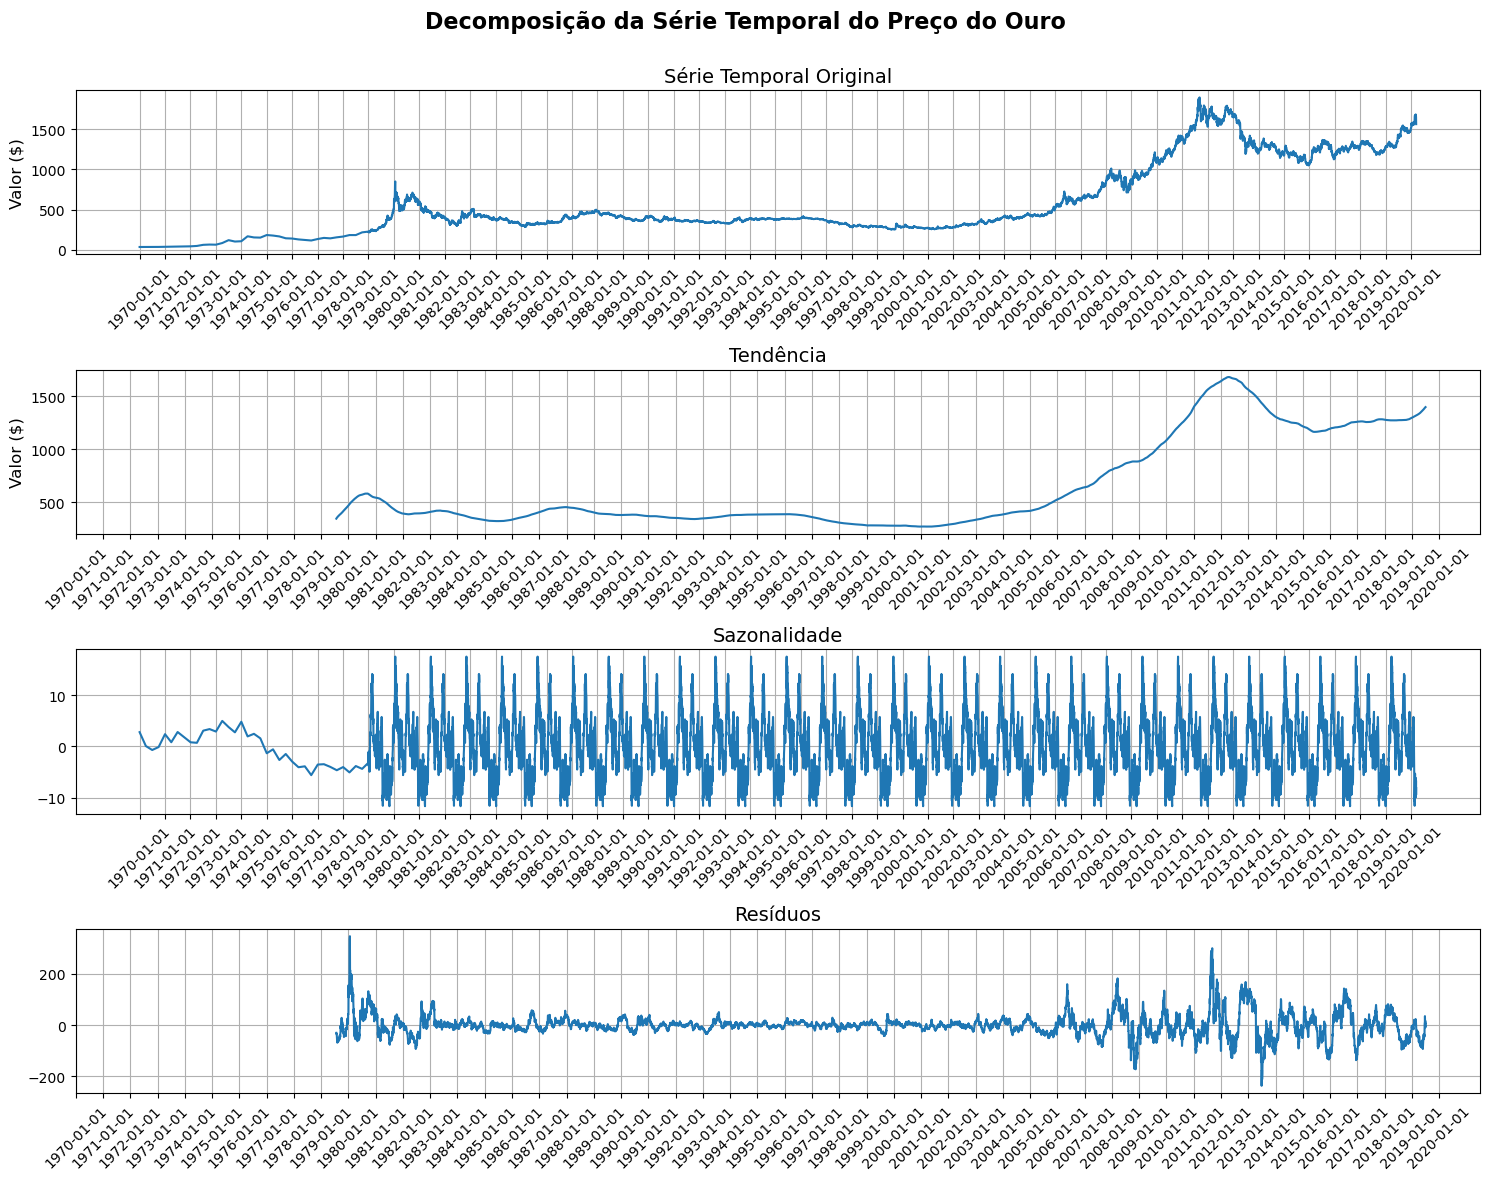

In [21]:
plt.figure(figsize=(15, 12))

# Série Temporal Original
plt.subplot(4, 1, 1)
plt.plot(serie_temporal)
plt.title('Série Temporal Original', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Tendência
plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Tendência', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Sazonalidade', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Resíduos', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Ajustar o intervalo do eixo x para mostrar todos os anos


# Título maior para a figura
plt.suptitle('Decomposição da Série Temporal do Preço do Ouro\n', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

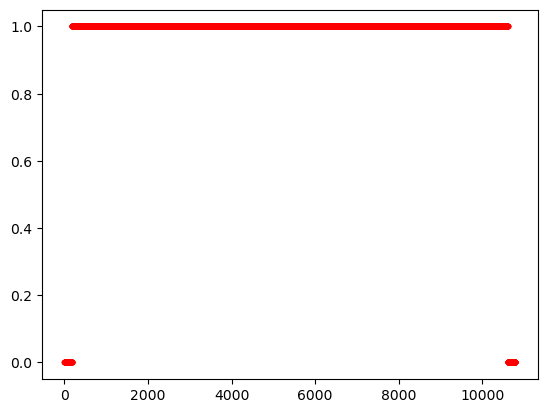

In [22]:
index_datetime = np.ones(len(residual))

index_datetime[residual.isna()] = 0

index_datetime = index_datetime.astype(bool) 

plt.plot(index_datetime, ".r")
plt.show()

In [23]:
serie_temporal_truncada = serie_temporal[index_datetime]
len(serie_temporal_truncada)

10423

In [24]:
residual.dropna(inplace=True)
len(residual)

10423

## Premissas para modelos lineares

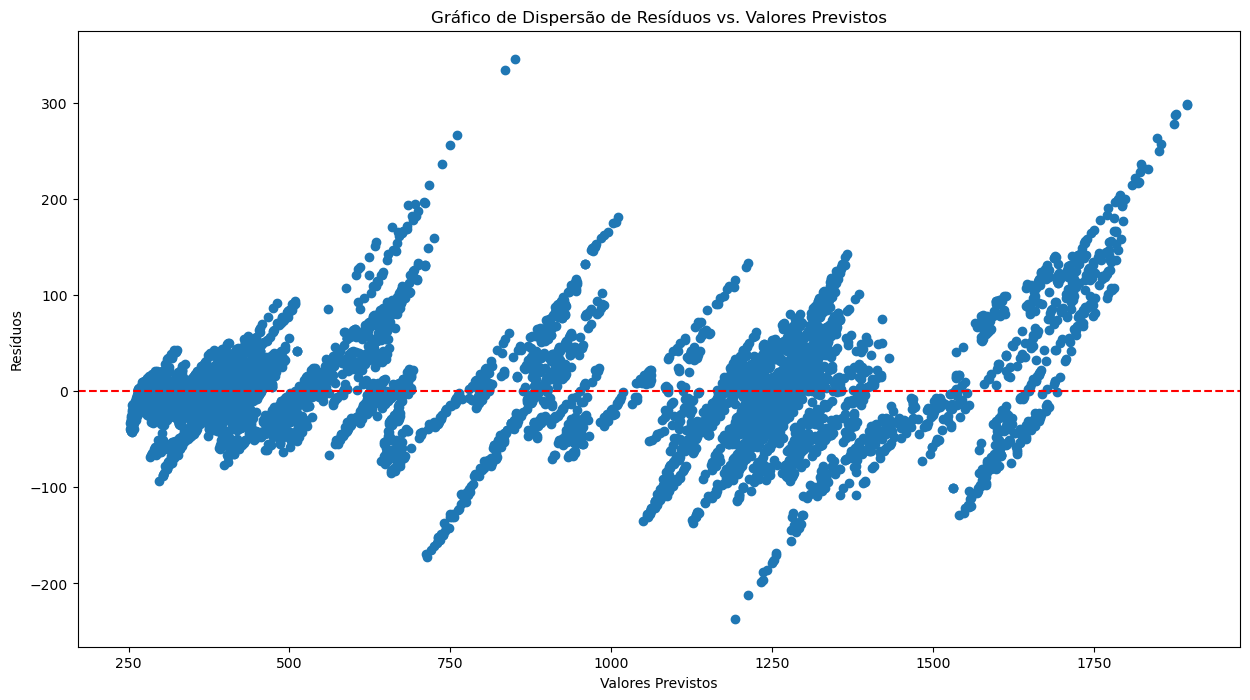

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(serie_temporal_truncada, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão de Resíduos vs. Valores Previstos')
plt.show()

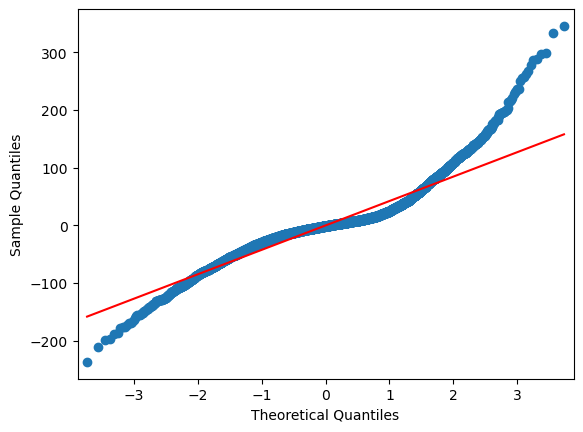

In [26]:
import scipy.stats as stats

sm.qqplot(residual, line='s') # 's' para linha de referência
plt.show()  

In [27]:
_, p_value = stats.shapiro(residual)
print(f'Valor-p do teste de Shapiro-Wilk: {p_value}')
#os resíduos não seguem uma distribuição normal


Valor-p do teste de Shapiro-Wilk: 0.0


In [28]:
from scipy.stats import kstest

ks_statistic, ks_p_value = kstest(residual, 'norm')
print(f"Teste de Kolmogorov-Smirnov - Estatística de Teste: {ks_statistic}, Valor p: {ks_p_value}")

Teste de Kolmogorov-Smirnov - Estatística de Teste: 0.4693529846817076, Valor p: 0.0


- Valor-p < 0.05 para os 2 testes indica que os resíduos não são normais;
- Logo, utilizar um modelo linear não seria adequado.

## Teste de auto-correlação

### A hipótese nula e a hipótese alternativa para o Teste de Durbin-Watson são

- H0 : Sem autocorrelação de primeira ordem.
- H1 : Existe alguma correlação de primeira ordem.

O teste Durbin Watson tem valores entre 0 e 4. Abaixo está a tabela que contém os valores e suas interpretações:

Em torno de 2 -> Sem autocorrelação. Geralmente, consideramos 1,5 a 2,5 sem correlação.
- < 2: autocorrelação positiva. Quanto mais próximo de 0, mais sinais de autocorrelação positiva.
- \> 2: autocorrelação negativa. Quanto mais próximo de 4, mais sinais de autocorrelação negativa.

Estatística de Durbin-Watson: 0.0428494501097162


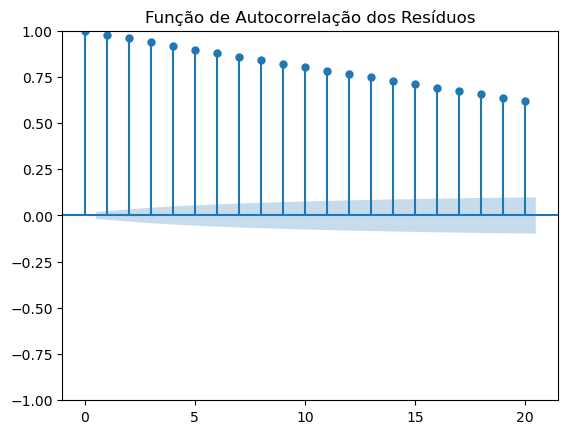

In [29]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Calcular a estatística de Durbin-Watson
dw_statistic = durbin_watson(residual)
print(f"Estatística de Durbin-Watson: {dw_statistic}")

# Plotar a função de autocorrelação dos resíduos
plot_acf(residual, lags=20)
plt.title('Função de Autocorrelação dos Resíduos')
plt.show()

- Logo, existe autocorrelação positiva nos dados;
- Utilizar um modelo sequencial, como LSTM, pode ser uma opção;
- Também atende a um dos requisitos do modelo ARIMA, que pode ser outra opção;